In [0]:
# Pasos previos: obtener credenciales en https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte
# Toda la documentacion esta disponible en: https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte/api-doc
# Repositorio online con toda la información: https://github.com/datosgcba/taller-api-transporte

In [0]:
# Para descargar en Jupyter Notebook
#! pip install datetime
#! pip install seaborn
#! pip install matplotlib

In [0]:
import pandas as pd
import numpy as np
import urllib.request
import re
import requests
import json
from pandas.io.json import json_normalize
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.pyplot import suptitle
from matplotlib import rc

In [0]:
pd.set_option('display.max_columns', 500)

## Vamos a la API de Transporte:

Consultamos los eventos en vía pública de la Ciudad de Buenos Aires

In [0]:
# Creamos un string con el endpoint que obtenemos en la API:
link_api_enero = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-01&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'

In [0]:
# pasamos el json a formato dataframe y le asignamos el encoding utf-8:
df_en=pd.read_json(link_api_enero, encoding='utf-8') 

In [0]:
#vemos lo que tiene el dataframe
df_en.head()

,list
0,"{'code': '176932', 'division': 'BA', 'type': '..."
1,"{'code': '177370', 'division': 'BA', 'type': '..."
2,"{'code': '201179', 'division': 'A1', 'type': '..."
3,"{'code': '208376', 'division': 'BA', 'type': '..."
4,"{'code': '210616', 'division': 'BA', 'type': '..."


In [0]:
# iteramos por cada columna y pasamos cada valor a una celda:
df_enero = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_en['list']],ignore_index=True, sort=True)

In [0]:
# asi queda df_enero
df_enero

,casualtiesPeople,closeTimestamp,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,name,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,0,2019-01-04T16:05:20Z,176932,2019-01-04T15:43:18Z,Obras en Monteagudo GCBA,BA,2019-01-04T16:05:20Z,-34.642704,-58.404549,0,Desconocido,False,False,0,0,NaN,MONTEAGUDO,MONTEAGUDO (S1),1_-34.642715+-58.404537,0,2019-01-04T15:53:39Z,BA,0,0,2019-01-04T15:43:21Z,Cancelado,2019-01-04T16:05:20Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T10:11:33Z,Martin Gilardon
1,0,2019-01-04T19:20:26Z,177370,2019-01-04T18:53:41Z,Obras gcba,BA,2019-01-04T19:20:26Z,-34.642704,-58.404549,0,Desconocido,False,False,0,0,NaN,MONTEAGUDO,MONTEAGUDO (S1),1_-34.642715+-58.404537,0,2019-01-04T19:05:18Z,BA,0,0,2019-01-04T18:53:49Z,Terminado,2019-01-04T19:20:26Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T11:03:01Z,Juan Sosa
2,0,2019-03-25T15:00:02Z,201179,2019-01-15T19:44:13Z,Buenos Aires:. En Junín (S) entre Arenales Y ...,A1,2019-03-25T15:00:02Z,-34.594471,-58.397167,0,Menor,False,False,0,0,NaN,JUNIN,JUNIN (N1),1_-34.59445+-58.397156,0,2019-01-15T20:01:11Z,BA,0,0,2019-01-15T19:44:00Z,Cancelado,2019-03-25T15:00:02Z,NaN,NaN,0,Cierre de carril,0,2019-03-25T15:00:02Z,Felipe Sala
3,0,2019-02-21T11:42:49Z,208376,2019-01-17T17:29:51Z,Buenos Aires:. En Humahuaca (W) en Humahuaca (...,BA,2019-02-21T11:42:33Z,-34.602566,-58.415928,0,Ninguno,False,False,0,0,NaN,BILLINGHURST,BILLINGHURST (N),1_-34.60265+-58.41547,0,2019-02-21T11:42:28Z,BA,0,0,2019-01-17T17:29:38Z,Terminado,2019-02-21T11:42:49Z,NaN,NaN,0,Manifestación,0,2019-03-05T13:25:51Z,Facundo Zaldo
4,0,2019-02-21T11:43:32Z,210616,2019-01-18T13:44:44Z,Buenos Aires:. En Avenida Raúl Scalabrini Orti...,BA,2019-02-21T11:43:32Z,-34.601284,-58.441097,0,Severo,False,False,0,0,NaN,"SCALABRINI ORTIZ, RAUL AV.","SCALABRINI ORTIZ, RAUL AV. (W)",1_-34.6013+-58.44109,0,2019-02-21T11:43:28Z,BA,0,0,2019-01-18T13:44:00Z,Terminado,2019-02-21T11:43:32Z,NaN,NaN,0,Manifestación,0,2019-03-05T10:11:34Z,Facundo Zaldo
5,0,2019-01-18T16:30:11Z,210965,2019-01-18T15:45:10Z,Buenos Aires:. En Avenida Hipólito Yrigoyen (E...,BA,2019-01-18T16:29:55Z,-34.612610,-58.413403,0,Menor,False,False,0,0,NaN,"YRIGOYEN, HIPOLITO AV.","YRIGOYEN, HIPOLITO AV. (E1)",1_-34.612614+-58.413437,0,2019-01-18T16:01:16Z,BA,0,0,2019-01-18T16:05:00Z,Terminado,2019-01-18T16:30:11Z,NaN,NaN,0,Manifestación,0,2019-03-05T11:47:45Z,Mesa de crisis
6,0,2019-03-25T15:01:58Z,211023,2019-01-18T16:14:11Z,Buenos Aires:. Debido a Obras en calzada en Fr...,BA,2019-01-19T16:14:00Z,-34.601742,-58.422379,0,Desconocido,False,False,0,0,NaN,HUMAHUACA,HUMAHUACA (E),1_-34.60175+-58.422382,0,2019-01-18T16:19:41Z,BA,0,0,2019-01-18T16:14:00Z,Cancelado,2019-03-25T15:01:58Z,1,Obras en calzada,0,Corte programado,0,2019-03-25T15:01:58Z,Mesa de crisis
7,0,2019-03-25T15:02:09Z,211100,2019-01-18T16:37:43Z,Buenos Aires:. Debido a Obras en calzada y Man...,BA,2019-03-25T15:02:09Z,-34.609543,-58.417400,0,Menor,False,False,0,0,NaN,"MITRE, BARTOLOME","MITRE, BARTOLOME (E)",1_-34.609554+-58.417408,0,2019-01-18T16:41:05Z,BA,0,0,2019-01-18T16:37:00Z,Cancelado,2019-03-25T15:02:09Z,"4,2","Manifestación,Obras en calzada",0,Corte NO programado,0,2019-03-25T15:02:09Z,Mesa de crisis
8,0,2019-03-22T12:52:49Z,211112,2019-01-18T16:43:21Z,Buenos Aires:. Debido a Accidente en Adolfo Al...,BA,2019-03-22T12:52:49Z,-34.612514,-58.406925,0,Menor,False,False,0,0,NaN,CATAMARCA,CATAMARCA (S1),1_-34.612503+-58.406944,0,2019-01-18T16:44:38Z,BA,0,0,2019-01-18T16:43:00Z,Cancelado,2019-03-22T12:52:49Z,8,Accidente,0,Accidente,0,2019-03-22T12:52:49Z,Mesa de crisis
9,0,2019-01-21T18:14:51Z,215685,2019-01-21T12:09:02Z,Obras en calzada,A1,2019-01-21T18:14:51Z,-34.635197

### Ahora hacemos lo mismo para el resto de los meses, hasta agosto inclusive...

#### Febrero

In [0]:
link_api_febrero = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-02&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_feb=pd.read_json(link_api_febrero, encoding='utf-8')
df_febrero = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_feb['list']],ignore_index=True, sort=True)
df_febrero.head()

,casualtiesPeople,closeTimestamp,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,name,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,0,2019-02-04T17:54:19Z,234140,2019-02-01T11:59:34Z,PODA,BA,2019-02-01T16:59:00Z,-34.641808,-58.474823,0,Menor,False,False,0,0,NaN,MARTINEZ CASTRO,MARTINEZ CASTRO (W1),1_-34.641808+-58.474804,0,2019-02-01T12:01:17Z,BA,0,0,2019-02-01T11:59:42Z,Terminado,2019-02-04T17:54:19Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T10:11:33Z,Ignacio Bagala
1,0,2019-02-04T14:45:11Z,236267,2019-02-01T19:18:12Z,CORTE TOTAL POR OPERATIVO DE BOMBEROS,A1,2019-02-04T14:45:11Z,-34.603669,-58.380894,0,Severo,False,False,0,0,NaN,"PELLEGRINI, CARLOS","PELLEGRINI, CARLOS (N)",1_-34.60367+-58.380978,0,2019-02-01T19:19:36Z,BA,0,0,2019-02-01T19:18:00Z,Terminado,2019-02-04T14:45:11Z,7,Riesgo en calzada,0,Corte NO programado,0,2019-03-05T12:06:06Z,Nicolas Nuñez
2,0,2019-02-02T01:20:30Z,237055,2019-02-01T20:51:30Z,CORTE TOTAL POR MANIFESTACION,BA,2019-02-02T01:20:30Z,-34.626624,-58.424154,0,Severo,False,False,0,0,NaN,SAN JUAN AV.,SAN JUAN AV. (E),1_-34.626614+-58.42414,0,2019-02-01T20:53:22Z,BA,0,0,2019-02-01T20:51:00Z,Terminado,2019-02-02T01:20:30Z,4,Manifestación,0,Corte NO programado,0,2019-03-05T12:06:06Z,Nicolas Nuñez
3,0,2019-02-21T11:39:42Z,244976,2019-02-05T03:27:36Z,Buenos Aires:. En Avenida Pueyrredón (S) entre...,A1,2019-02-21T11:39:42Z,-34.601920,-58.404790,0,Menor,False,False,0,0,NaN,PUEYRREDON AV.,PUEYRREDON AV. (N),1_-34.601837+-58.404804,0,2019-02-21T11:39:36Z,BA,0,0,2019-02-05T03:27:40Z,Terminado,2019-02-21T11:39:42Z,NaN,NaN,0,Manifestación,0,2019-03-05T13:25:51Z,ICM System Administrator example
4,0,2019-02-06T00:49:53Z,245516,2019-02-05T11:46:22Z,PODA,BA,2019-02-05T17:00:00Z,-34.547367,-58.481831,0,Menor,False,False,0,0,NaN,CORREA,CORREA (E2),1_-34.54738+-58.48183,0,2019-02-05T11:47:09Z,BA,0,0,2019-02-05T11:46:00Z,Terminado,2019-02-06T00:49:53Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T12:18:37Z,Ignacio Bagala


#### Marzo

In [0]:
link_api_marzo = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-03&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_mar=pd.read_json(link_api_marzo, encoding='utf-8')
df_marzo = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_mar['list']],ignore_index=True, sort=True)
df_marzo.head()

,affectedLinkLanes,casualtiesPeople,closeTimestamp,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,name,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,nodeTo,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,NaN,0,2019-03-25T13:57:23Z,332858,2019-03-01T10:23:01Z,DESVIO DE AGENTES,A1,2019-03-25T13:57:23Z,-34.613770,-58.391724,0,Severo,False,False,0,0,NaN,ENTRE RIOS AV.,ENTRE RIOS AV. (S),1_-34.613823+-58.391712,NaN,0,2019-03-01T10:23:42Z,BA,0,0,2019-03-01T10:23:00Z,Terminado,2019-03-25T13:57:23Z,4,Manifestación,0,Corte NO programado,0,2019-03-25T13:57:24Z,Ignacio Bagala
1,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-05-15T15:44:37Z,366069,2019-03-08T15:34:46Z,OBRAS,BA,2019-03-30T15:00:00Z,-34.647885,-58.412270,0,Menor,False,False,0,0,OBRAS,CACHI,CACHI (S),NaN,NaN,0,2019-03-08T15:36:38Z,BA,0,0,2019-03-08T15:00:00Z,Terminado,2019-05-15T15:44:37Z,1,Obras en calzada,2,Corte programado,0,2019-05-15T15:44:37Z,Jorge Suarez
2,"[{'laneNum': 0}, {'laneNum': 99}, {'laneNum': ...",0,2019-03-22T14:57:34Z,399264,2019-03-13T21:45:59Z,"Corte total, por manifestacion",A1,2019-03-22T14:57:34Z,-34.601658,-58.385275,0,Severo,False,False,0,0,NaN,TALCAHUANO,TALCAHUANO (N),NaN,NaN,0,2019-03-13T21:46:38Z,BA,0,0,2019-03-13T21:46:04Z,Terminado,2019-03-22T14:57:34Z,4,Manifestación,2,Corte NO programado,0,2019-03-22T14:57:34Z,Martin Ojeda
3,"[{'laneNum': 0}, {'laneNum': 99}, {'laneNum': ...",0,2019-03-25T13:54:49Z,425343,2019-03-18T13:02:00Z,OPERATIVO POLICIAL,A1,2019-03-25T13:54:40Z,-34.591602,-58.381561,0,Severo,False,False,0,0,NaN,ARROYO,ARROYO (E),1_-34.591602+-58.38156,NaN,0,2019-03-18T13:03:14Z,BA,0,0,2019-03-18T13:02:00Z,Terminado,2019-03-25T13:54:49Z,2,Obras en calzada,2,Corte NO programado,0,2019-03-25T13:54:49Z,Ignacio Bagala
4,"[{'laneNum': 0}, {'laneNum': 1, 'laneType': 'N...",0,2019-05-03T13:43:26Z,470401,2019-03-25T15:56:10Z,"Corrientes entre Callao y Libertad, corte parc...",A1,2019-04-30T15:56:00Z,-34.604435,-58.392288,0,Considerable,False,False,0,0,NaN,CORRIENTES AV.,CORRIENTES AV. (E1),1_-34.604435+-58.39229,1_-34.60383+-58.383717,0,2019-03-25T15:59:39Z,BA,0,0,2019-03-25T15:56:00Z,Terminado,2019-05-03T13:43:26Z,NaN,NaN,2,Cierre de carril,0,2019-05-03T13:43:26Z,Martin Ojeda


#### Abril

In [0]:
link_api_abril = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-04&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_abr = pd.read_json(link_api_abril, encoding = 'utf-8')
df_abril = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_abr['list']],ignore_index=True, sort=True)
df_abril.head()

,affectedLinkLanes,casualtiesPeople,closeTimestamp,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,name,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,nodeTo,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-04-02T13:17:24Z,505670,2019-04-02T13:13:06Z,"Buenos Aires:. En CHUTRO, PEDRO, Prof., Dr. (E...",BA,2019-04-02T13:17:24Z,-34.641602,-58.402718,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,NaN,0,2019-04-02T13:13:40Z,BA,0,0,2019-04-02T13:13:00Z,Cancelado,2019-04-02T13:17:24Z,NaN,NaN,2,Manifestación,0,2019-04-02T13:17:24Z,Carlos Pereyra
1,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,NaN,563517,2019-04-10T12:57:47Z,OBRAS,BA,2019-04-24T12:58:00Z,-34.559303,-58.447247,0,Considerable,False,False,0,0,NaN,"SUCRE, ANTONIO JOSE de, Mcal.","SUCRE, ANTONIO JOSE de, Mcal. (E1)",1_-34.559303+-58.447247,1_-34.558594+-58.44605,0,2019-04-10T13:00:27Z,BA,0,0,2019-04-10T12:57:00Z,Inactivo,2019-04-24T12:58:00Z,2131,Pavimentación,2,Obras,0,2019-04-24T12:58:00Z,Ignacio Bagala
2,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-04-10T15:39:07Z,565611,2019-04-10T15:26:50Z,"Prueba Buenos Aires:. En CHUTRO, PEDRO, Prof.,...",BA,2019-04-10T16:25:00Z,-34.641602,-58.402718,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,NaN,0,2019-04-10T15:29:49Z,BA,0,0,2019-04-10T15:26:53Z,Cancelado,2019-04-10T15:39:07Z,NaN,NaN,2,Manifestación,0,2019-04-10T15:39:07Z,Prueba Control Calidad
3,"[{'laneNum': 0}, {'laneNum': 99}, {'laneNum': ...",0,2019-04-10T15:58:33Z,565952,2019-04-10T15:48:25Z,Prueba Buenos Aires:. Debido a Musical en CHUT...,BA,2019-04-10T16:47:00Z,-34.642094,-58.404663,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.642094+-58.404663,NaN,0,2019-04-10T15:49:45Z,BA,0,0,2019-04-10T15:48:28Z,Cancelado,2019-04-10T15:58:33Z,2122,Musical,2,Evento,0,2019-04-10T15:58:33Z,Prueba Control Calidad
4,"[{'laneNum': 0}, {'laneNum': 99}, {'laneNum': ...",0,2019-04-10T16:39:39Z,566384,2019-04-10T15:58:55Z,"Prueba Buenos Aires:. En CHUTRO, PEDRO, Prof.,...",BA,2019-04-10T16:39:39Z,-34.641602,-58.402718,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,NaN,0,2019-04-10T16:00:29Z,BA,0,0,2019-04-10T15:58:58Z,Cancelado,2019-04-10T16:39:39Z,2231,Pavimentación,2,Obras,0,2019-04-10T16:39:39Z,Prueba Control Calidad


#### Mayo

In [0]:
link_api_mayo = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-05&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_may = pd.read_json(link_api_mayo, encoding = 'utf-8')
df_mayo = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_may['list']],ignore_index=True, sort=True)
df_mayo.head()

,affectedLinkLanes,casualtiesPeople,closeTimestamp,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,name,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,nodeTo,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-05-02T12:37:31Z,719686,2019-05-02T12:32:11Z,OBRAS,BA,2019-05-02T13:32:00Z,-34.659538,-58.510117,0,Ninguno,False,False,0,0,OBRAS - PAVIMENTACION,ANDALGALA,ANDALGALA (W),1_-34.65954+-58.510117,1_-34.660545+-58.50891,0,2019-05-02T12:34:24Z,BA,0,0,2019-05-02T12:32:00Z,Cancelado,2019-05-02T12:37:31Z,2131,Pavimentación,2,Obras,0,2019-05-02T12:37:31Z,Jorge Suarez
1,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-05-03T19:45:12Z,733775,2019-05-03T18:42:32Z,"Buenos Aires:. En CHUTRO, PEDRO, Prof., Dr. (E...",BA,2019-05-03T19:42:00Z,-34.641602,-58.402718,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,NaN,0,2019-05-03T18:51:26Z,BA,0,0,2019-05-03T18:42:00Z,Cancelado,2019-05-03T19:45:12Z,NaN,NaN,2,Manifestación,0,2019-05-03T19:45:12Z,Carlos Pereyra
2,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-05-03T20:00:15Z,734827,2019-05-03T19:46:47Z,"Buenos Aires:. En CHUTRO, PEDRO, Prof., Dr. (E...",BA,2019-05-03T20:00:15Z,-34.641602,-58.402718,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,NaN,0,2019-05-03T19:47:22Z,BA,0,0,2019-05-03T19:46:00Z,Cancelado,2019-05-03T20:00:15Z,NaN,NaN,2,Manifestación,0,2019-05-03T20:00:15Z,Carlos Pereyra
3,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-05-07T13:24:24Z,756145,2019-05-07T11:58:36Z,INCIDENTE VIAL,BA,2019-05-07T13:24:24Z,-34.586422,-58.437172,0,Menor,False,False,0,0,NaN,"CABRERA, JOSE A.","CABRERA, JOSE A. (E1)",1_-34.586422+-58.437172,NaN,0,2019-05-07T11:59:54Z,BA,0,0,2019-05-07T11:58:00Z,Terminado,2019-05-07T13:24:24Z,8,Accidente,2,Accidente,0,2019-05-07T13:24:24Z,Ignacio Bagala
4,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-05-15T15:50:19Z,817143,2019-05-15T15:45:03Z,"Buenos Aires:. En CHUTRO, PEDRO, Prof., Dr. (E...",BA,2019-05-16T02:58:00Z,-34.641602,-58.402718,0,Menor,False,False,0,0,NaN,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,1_-34.642094+-58.404663,0,2019-05-15T15:45:44Z,BA,0,0,2019-05-15T15:45:06Z,Terminado,2019-05-15T15:50:19Z,NaN,NaN,2,Manifestación,0,2019-05-15T15:50:20Z,Martin Ojeda


#### Junio

In [0]:
link_api_junio = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-06&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_jun = pd.read_json(link_api_junio, encoding = 'utf-8')
df_junio = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_jun['list']],ignore_index=True, sort=True)
df_junio.head()

,affectedLinkLanes,casualtiesPeople,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,nodeTo,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,1013892,2019-06-10T16:14:25Z,Buenos Aires:. Debido a Accidente en LINIERS V...,BA,2019-06-10T16:45:00Z,-34.623333,-58.413731,0,Menor,False,False,0,0,LINIERS VIRREY,LINIERS VIRREY (S),1_-34.623333+-58.41373,1_-34.622086+-58.413685,0,2019-06-10T16:15:21Z,BA,0,0,2019-06-10T16:14:00Z,Activo,2019-06-10T16:15:21Z,8,Accidente,2,Accidente,0,2019-06-10T19:44:51Z,Martin Ojeda
1,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,1014167,2019-06-10T16:43:15Z,Buenos Aires:. Debido a Obras en calzada en CH...,A1,2019-06-10T20:00:00Z,-34.613907,-58.376095,0,Menor,False,False,0,0,CHACABUCO,CHACABUCO (S),1_-34.613907+-58.376095,1_-34.61275+-58.37616,0,2019-06-10T16:44:29Z,BA,0,0,2019-06-10T16:43:00Z,Activo,2019-06-10T16:44:29Z,2,Obras en calzada,2,Corte NO programado,0,2019-06-10T19:44:51Z,Martin Ojeda


#### Julio

In [0]:
link_api_julio = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-07&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_jul = pd.read_json(link_api_julio, encoding = 'utf-8')
df_julio = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_jul['list']],ignore_index=True, sort=True)
df_julio.head()

,affectedLinkLanes,casualtiesPeople,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,1270182,2019-07-11T13:49:55Z,Corte total por Obra,BA,2019-07-28T20:59:00Z,-34.576794,-58.423531,0,Considerable,False,False,0,0,GODOY CRUZ,GODOY CRUZ (N),1_-34.576794+-58.42353,0,2019-07-11T13:53:53Z,BA,0,0,2019-07-11T13:50:02Z,Inactivo,2019-07-28T20:59:00Z,2134,Otros,2,Obras,0,2019-07-28T20:59:00Z,Ignacio Bagala


#### Agosto

In [0]:
link_api_agosto = 'https://apitransporte.buenosaires.gob.ar/transito/v1/eventos?month=2019-08&provider=1&client_id=e9c803c8d95f4c8798afae7d433ae75d&client_secret=2c890A2834F34ADD81507c0953014171'
df_ago = pd.read_json(link_api_agosto, encoding = 'utf-8')
df_agosto = pd.concat([pd.DataFrame(json_normalize(x)) for x in df_ago['list']],ignore_index=True, sort=True)
df_agosto.head()

,affectedLinkLanes,casualtiesPeople,closeTimestamp,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,nodeTo,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-08-06T14:03:40Z,1462000,2019-08-06T13:54:38Z,Buenos Aires:. Debido a Manifestación en MITRE...,A1,2019-08-06T14:03:34Z,-34.606564,-58.370872,0,Considerable,False,False,0,0,"MITRE, BARTOLOME","MITRE, BARTOLOME (E)",1_-34.606564+-58.370872,NaN,0,2019-08-06T13:55:32Z,BA,0,0,2019-08-06T13:54:00Z,Terminado,2019-08-06T14:03:40Z,4,Manifestación,2,Corte NO programado,0,2019-08-06T14:03:40Z,Martin Gilardon
1,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-08-06T14:35:57Z,1462070,2019-08-06T14:04:26Z,Buenos Aires:. En PASCO (S1) en 15 DE NOVIEMB...,BA,2019-08-06T14:35:52Z,-34.632507,-58.394642,0,Menor,False,False,0,0,PASCO,PASCO (S1),1_-34.632507+-58.39464,NaN,0,2019-08-06T14:04:55Z,BA,0,0,2019-08-06T14:04:00Z,Terminado,2019-08-06T14:35:57Z,NaN,NaN,2,Manifestación,0,2019-08-06T14:35:57Z,Martin Gilardon
2,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-08-06T14:36:21Z,1462151,2019-08-06T14:15:36Z,Buenos Aires:. Debido a Obras en calzada en MO...,BA,2019-08-06T14:36:16Z,-34.641094,-58.404861,0,Considerable,False,False,0,0,MONTEAGUDO,MONTEAGUDO (S1),1_-34.641094+-58.40486,NaN,0,2019-08-06T14:16:11Z,BA,0,0,2019-08-06T14:15:00Z,Terminado,2019-08-06T14:36:21Z,2,Obras en calzada,2,Corte NO programado,0,2019-08-06T14:36:21Z,Martin Gilardon
3,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,NaN,1463734,2019-08-06T19:17:37Z,CORTE POR OBRAS,BA,2019-08-07T09:00:00Z,-34.670895,-58.476234,0,Considerable,False,False,0,0,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,"DELLEPIANE, LUIS, TTE. GRAL. (S23)",1_-34.670895+-58.476234,1_-34.683067+-58.48201,0,2019-08-06T19:24:09Z,BA,0,0,2019-08-07T00:00:00Z,Inactivo,2019-08-07T09:00:00Z,2132,Bacheo,2,Obras,0,2019-08-07T09:00:00Z,Martin Ojeda
4,"[{'laneNum': 1, 'laneType': 'Normal'}, {'laneN...",0,2019-08-06T19:34:30Z,1463843,2019-08-06T19:31:02Z,MANIFESTACION,BA,2019-08-06T21:00:00Z,-34.641602,-58.402718,0,Considerable,False,False,0,0,"CHUTRO, PEDRO, Prof., Dr.","CHUTRO, PEDRO, Prof., Dr. (E)",1_-34.6416+-58.402718,1_-34.642094+-58.404663,0,2019-08-06T19:31:51Z,BA,0,0,2019-08-06T19:31:00Z,Terminado,2019-08-06T19:34:30Z,4,Manifestación,2,Corte NO programado,0,2019-08-06T19:34:30Z,Martin Ojeda


### Ahora que ya tenemos la información de todos los meses, vamos a proceder a juntarla toda en un solo dataframe. Para esto, es necesario que todos los dataframes que vamos a unir tengan las mismas columnas

In [0]:
#nos quedamos con las columnas que estan en todos los dataframes, que son las siguientes:
df_enero = df_enero[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_febrero = df_febrero[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_marzo = df_marzo[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_abril = df_abril[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_mayo = df_mayo[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_junio = df_junio[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_julio = df_julio[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
df_agosto = df_agosto[['casualtiesPeople',  'code',
       'createTimestamp', 'description', 'division', 'endTimestamp', 'fromLat',
       'fromLon', 'heavyVehicle', 'impact', 'isBothDirections', 'isRepetitive',
       'lightVehicle', 'minorInjuredPeople',
       'networkPointFromLinkName', 'networkPointFromRoadWayName', 'nodeFrom',
       'numAffectedLanes', 'openTimestamp', 'organization',
       'otherVehicle', 'seriouslyInjuredPeople', 'startTimestamp', 'status',
       'statusTimestamp', 'subtypeCodes', 'subtypeNames', 'totalLanes', 'type',
       'uninjuredPeople', 'updateTimestamp', 'userName']]

In [0]:
print('enero: ',df_enero.shape)
print('febrero: ',df_febrero.shape)
print('marzo: ', df_marzo.shape)
print('abril: ', df_abril.shape)
print('mayo: ', df_mayo.shape)
print('junio: ',df_junio.shape)
print('julio: ', df_julio.shape)
print('agosto: ', df_agosto.shape)

enero:  (71, 32)
febrero:  (32, 32)
marzo:  (20, 32)
abril:  (19, 32)
mayo:  (10, 32)
junio:  (2, 32)
julio:  (1, 32)
agosto:  (7, 32)


In [0]:
# Ahora si, podemos juntar todos los dataframes de cada mes en uno solo:
df=pd.concat([df_enero, df_febrero, df_marzo, df_abril, df_mayo, df_junio, df_julio, df_agosto], axis=0)

In [0]:
df=df.reset_index().drop('index', axis=1)

In [0]:
df

,casualtiesPeople,code,createTimestamp,description,division,endTimestamp,fromLat,fromLon,heavyVehicle,impact,isBothDirections,isRepetitive,lightVehicle,minorInjuredPeople,networkPointFromLinkName,networkPointFromRoadWayName,nodeFrom,numAffectedLanes,openTimestamp,organization,otherVehicle,seriouslyInjuredPeople,startTimestamp,status,statusTimestamp,subtypeCodes,subtypeNames,totalLanes,type,uninjuredPeople,updateTimestamp,userName
0,0,176932,2019-01-04T15:43:18Z,Obras en Monteagudo GCBA,BA,2019-01-04T16:05:20Z,-34.642704,-58.404549,0,Desconocido,False,False,0,0,MONTEAGUDO,MONTEAGUDO (S1),1_-34.642715+-58.404537,0,2019-01-04T15:53:39Z,BA,0,0,2019-01-04T15:43:21Z,Cancelado,2019-01-04T16:05:20Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T10:11:33Z,Martin Gilardon
1,0,177370,2019-01-04T18:53:41Z,Obras gcba,BA,2019-01-04T19:20:26Z,-34.642704,-58.404549,0,Desconocido,False,False,0,0,MONTEAGUDO,MONTEAGUDO (S1),1_-34.642715+-58.404537,0,2019-01-04T19:05:18Z,BA,0,0,2019-01-04T18:53:49Z,Terminado,2019-01-04T19:20:26Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T11:03:01Z,Juan Sosa
2,0,201179,2019-01-15T19:44:13Z,Buenos Aires:. En Junín (S) entre Arenales Y ...,A1,2019-03-25T15:00:02Z,-34.594471,-58.397167,0,Menor,False,False,0,0,JUNIN,JUNIN (N1),1_-34.59445+-58.397156,0,2019-01-15T20:01:11Z,BA,0,0,2019-01-15T19:44:00Z,Cancelado,2019-03-25T15:00:02Z,NaN,NaN,0,Cierre de carril,0,2019-03-25T15:00:02Z,Felipe Sala
3,0,208376,2019-01-17T17:29:51Z,Buenos Aires:. En Humahuaca (W) en Humahuaca (...,BA,2019-02-21T11:42:33Z,-34.602566,-58.415928,0,Ninguno,False,False,0,0,BILLINGHURST,BILLINGHURST (N),1_-34.60265+-58.41547,0,2019-02-21T11:42:28Z,BA,0,0,2019-01-17T17:29:38Z,Terminado,2019-02-21T11:42:49Z,NaN,NaN,0,Manifestación,0,2019-03-05T13:25:51Z,Facundo Zaldo
4,0,210616,2019-01-18T13:44:44Z,Buenos Aires:. En Avenida Raúl Scalabrini Orti...,BA,2019-02-21T11:43:32Z,-34.601284,-58.441097,0,Severo,False,False,0,0,"SCALABRINI ORTIZ, RAUL AV.","SCALABRINI ORTIZ, RAUL AV. (W)",1_-34.6013+-58.44109,0,2019-02-21T11:43:28Z,BA,0,0,2019-01-18T13:44:00Z,Terminado,2019-02-21T11:43:32Z,NaN,NaN,0,Manifestación,0,2019-03-05T10:11:34Z,Facundo Zaldo
5,0,210965,2019-01-18T15:45:10Z,Buenos Aires:. En Avenida Hipólito Yrigoyen (E...,BA,2019-01-18T16:29:55Z,-34.612610,-58.413403,0,Menor,False,False,0,0,"YRIGOYEN, HIPOLITO AV.","YRIGOYEN, HIPOLITO AV. (E1)",1_-34.612614+-58.413437,0,2019-01-18T16:01:16Z,BA,0,0,2019-01-18T16:05:00Z,Terminado,2019-01-18T16:30:11Z,NaN,NaN,0,Manifestación,0,2019-03-05T11:47:45Z,Mesa de crisis
6,0,211023,2019-01-18T16:14:11Z,Buenos Aires:. Debido a Obras en calzada en Fr...,BA,2019-01-19T16:14:00Z,-34.601742,-58.422379,0,Desconocido,False,False,0,0,HUMAHUACA,HUMAHUACA (E),1_-34.60175+-58.422382,0,2019-01-18T16:19:41Z,BA,0,0,2019-01-18T16:14:00Z,Cancelado,2019-03-25T15:01:58Z,1,Obras en calzada,0,Corte programado,0,2019-03-25T15:01:58Z,Mesa de crisis
7,0,211100,2019-01-18T16:37:43Z,Buenos Aires:. Debido a Obras en calzada y Man...,BA,2019-03-25T15:02:09Z,-34.609543,-58.417400,0,Menor,False,False,0,0,"MITRE, BARTOLOME","MITRE, BARTOLOME (E)",1_-34.609554+-58.417408,0,2019-01-18T16:41:05Z,BA,0,0,2019-01-18T16:37:00Z,Cancelado,2019-03-25T15:02:09Z,"4,2","Manifestación,Obras en calzada",0,Corte NO programado,0,2019-03-25T15:02:09Z,Mesa de crisis
8,0,211112,2019-01-18T16:43:21Z,Buenos Aires:. Debido a Accidente en Adolfo Al...,BA,2019-03-22T12:52:49Z,-34.612514,-58.406925,0,Menor,False,False,0,0,CATAMARCA,CATAMARCA (S1),1_-34.612503+-58.406944,0,2019-01-18T16:44:38Z,BA,0,0,2019-01-18T16:43:00Z,Cancelado,2019-03-22T12:52:49Z,8,Accidente,0,Accidente,0,2019-03-22T12:52:49Z,Mesa de crisis
9,0,215685,2019-01-21T12:09:02Z,Obras en calzada,A1,2019-01-21T18:14:51Z,-34.635197,-58.358973,0,Menor,False,False,0,0,"BROWN, ALTE. AV.","BROWN, ALTE. AV. (S)",1_-34.63532+-58.35889,0,2019-01-21T12:11:35Z,BA,0,0,2019-01-21T12:05:00Z,Terminado,2019-01-21T18:14:51Z,2,Obras en calzada,0,Corte NO programado,0,2019-03-05T11:47:45Z,Soledad Iurato


In [0]:
df.shape

(162, 32)

## Ahora que tenemos la data, manos a la obra!

In [6]:
### En el caso de que no se  haya podido correr el código anterior, el csv puede ser obtenido corriendo la siguiente linea:
##df = pd.read_csv("https://github.com/datosgcba/taller-api-transporte/blob/master/eventos_enero_a_agosto.csv", error_bad_lines=False)

b'Skipping line 75: expected 1 fields, saw 7\nSkipping line 124: expected 1 fields, saw 3\nSkipping line 141: expected 1 fields, saw 9\nSkipping line 142: expected 1 fields, saw 3\nSkipping line 166: expected 1 fields, saw 4\nSkipping line 170: expected 1 fields, saw 2\nSkipping line 172: expected 1 fields, saw 2\nSkipping line 173: expected 1 fields, saw 2\nSkipping line 174: expected 1 fields, saw 2\nSkipping line 175: expected 1 fields, saw 2\nSkipping line 176: expected 1 fields, saw 2\nSkipping line 177: expected 1 fields, saw 2\nSkipping line 178: expected 1 fields, saw 2\nSkipping line 179: expected 1 fields, saw 2\nSkipping line 180: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 185: expected 1 fields, saw 2\nSkipping line 191: expected 1 fields, saw 2\nSkipping line 199: expected 1 fields, saw 4\nSkipping line 205: expected 1 fields, saw 2\nSkipping line 210: expected 1 fields, saw 2\nSkipping line 211: expected 1 fields, saw 2\nSkipping 

In [0]:
# Empezamos quitando las columnas que no nos aportan informacion relevante para nuestro analisis. Asi, nos quedamos
# con las siguientes columnas:
df=df[['description',
        'endTimestamp', 'fromLat', 'fromLon',
       'impact', 'isBothDirections',  'lightVehicle',
        'networkPointFromLinkName', 'startTimestamp', 'status', 
       'subtypeCodes', 'subtypeNames', 'totalLanes', 'type']]

### Vamos a empezar revisando las calles en las que hubo eventos:

In [0]:
np.sort(df['networkPointFromLinkName'].unique())

array(['24 DE NOVIEMBRE', '9 DE JULIO AV.', 'ALBERDI, JUAN BAUTISTA AV.',
       'ALEM, LEANDRO N. AV.', 'ALSINA, ADOLFO', 'ANDALGALA', 'ARRIBE�OS',
       'ARROYO', 'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI',
       'AUTOPISTA DELLEPIANE LUIS TTE. GRAL.', 'BAHIA BLANCA',
       'BILLINGHURST', 'BOEDO AV.', 'BOLIVAR', 'BONIFACIO, JOSE',
       'BROWN, ALTE. AV.', 'CABILDO AV.', 'CABRERA, JOSE A.', 'CACHI',
       'CALLAO AV.', 'CALZADA CIRCULAR PLAZA DE LOS CONGRESOS',
       'CAMPOS, LUIS M. AV.', 'CARHUE', 'CARRASCO AV.', 'CATAMARCA',
       'CERRITO', 'CHACABUCO', 'CHUTRO, PEDRO, Prof., Dr.',
       'COLECTORA CANTILO, Int.', 'COLOMBIA AV.', 'CONESA', 'CORDOBA AV.',
       'CORREA', 'CORRIENTES AV.', 'DE MAYO AV.', 'DEL LIBERTADOR AV.',
       'DIAZ VELEZ AV.', 'EL FOGON', 'ENTRE RIOS AV.', 'EREZCANO',
       'FRANKLIN', 'GALVEZ, MANUEL', 'GARAY, JUAN DE AV.',
       'GARCIA, TEODORO', 'GARMENDIA AV.', 'GASCON', 'GODOY CRUZ',
       'GONZALEZ, JOAQUIN V.', 'GUALEGUAY', 'GURRUCHAGA

In [0]:
# Filtramos las filas del dataset que tienen la calle ARRIBEÑOS
df[df['networkPointFromLinkName']== 'ARRIBE�OS']

,description,endTimestamp,fromLat,fromLon,impact,isBothDirections,lightVehicle,networkPointFromLinkName,startTimestamp,status,subtypeCodes,subtypeNames,totalLanes,type
97,OBRAS,2019-03-23T02:59:00Z,-34.558072,-58.450053,Menor,False,0,ARRIBE�OS,2019-02-20T11:00:00Z,Terminado,1,Obras en calzada,0,Corte programado
102,OBRAS,2019-04-04T13:00:00Z,-34.557158,-58.450930,Menor,False,0,ARRIBE�OS,2019-02-28T13:00:00Z,Inactivo,1,Obras en calzada,0,Corte programado


In [0]:
# Y las corregimos
df.iloc[97,7]=df.iloc[97,7]='ARRIBEÑOS'
df.iloc[102,7]=df.iloc[102,7]='ARRIBEÑOS'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
# Lo mismo para las filas cuya calle es Humerto Primo
df[df['networkPointFromLinkName']== 'HUMBERTO 1�']

,description,endTimestamp,fromLat,fromLon,impact,isBothDirections,lightVehicle,networkPointFromLinkName,startTimestamp,status,subtypeCodes,subtypeNames,totalLanes,type
115,CORTE TOTAL POR EVENTO,2019-03-26T21:10:19Z,-34.621559,-58.391556,Severo,False,0,HUMBERTO 1�,2019-03-26T17:40:00Z,Terminado,4,Manifestación,2,Corte NO programado


In [0]:
df.iloc[115,7]=df.iloc[115,7]='HUMBERTO PRIMO'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
np.sort(df['networkPointFromLinkName'].unique())

array(['24 DE NOVIEMBRE', '9 DE JULIO AV.', 'ALBERDI, JUAN BAUTISTA AV.',
       'ALEM, LEANDRO N. AV.', 'ALSINA, ADOLFO', 'ANDALGALA', 'ARRIBEÑOS',
       'ARROYO', 'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI',
       'AUTOPISTA DELLEPIANE LUIS TTE. GRAL.', 'BAHIA BLANCA',
       'BILLINGHURST', 'BOEDO AV.', 'BOLIVAR', 'BONIFACIO, JOSE',
       'BROWN, ALTE. AV.', 'CABILDO AV.', 'CABRERA, JOSE A.', 'CACHI',
       'CALLAO AV.', 'CALZADA CIRCULAR PLAZA DE LOS CONGRESOS',
       'CAMPOS, LUIS M. AV.', 'CARHUE', 'CARRASCO AV.', 'CATAMARCA',
       'CERRITO', 'CHACABUCO', 'CHUTRO, PEDRO, Prof., Dr.',
       'COLECTORA CANTILO, Int.', 'COLOMBIA AV.', 'CONESA', 'CORDOBA AV.',
       'CORREA', 'CORRIENTES AV.', 'DE MAYO AV.', 'DEL LIBERTADOR AV.',
       'DIAZ VELEZ AV.', 'EL FOGON', 'ENTRE RIOS AV.', 'EREZCANO',
       'FRANKLIN', 'GALVEZ, MANUEL', 'GARAY, JUAN DE AV.',
       'GARCIA, TEODORO', 'GARMENDIA AV.', 'GASCON', 'GODOY CRUZ',
       'GONZALEZ, JOAQUIN V.', 'GUALEGUAY', 'GURRUCHAGA

In [0]:
# Cuantas calles distintas tenemos?
len(df['networkPointFromLinkName'].unique())

110

## Veamos las fechas...

In [0]:
#Para manipularlas eficientemente, le damos formato datetime a las fechas:
df.startTimestamp=df.loc[:, 'startTimestamp'].apply(lambda x: pd.to_datetime(x))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
df.loc['mes']=df.loc[:, 'startTimestamp'].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df['dia']=df.loc[:, 'startTimestamp'].dt.day_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df

,description,endTimestamp,fromLat,fromLon,impact,isBothDirections,lightVehicle,networkPointFromLinkName,startTimestamp,status,subtypeCodes,subtypeNames,totalLanes,type,dia
0,Obras en Monteagudo GCBA,2019-01-04T16:05:20Z,-34.642704,-58.404549,Desconocido,0.0,0.0,MONTEAGUDO,2019-01-04 15:43:21+00:00,Cancelado,2,Obras en calzada,0.0,Corte NO programado,Friday
1,Obras gcba,2019-01-04T19:20:26Z,-34.642704,-58.404549,Desconocido,0.0,0.0,MONTEAGUDO,2019-01-04 18:53:49+00:00,Terminado,2,Obras en calzada,0.0,Corte NO programado,Friday
2,Buenos Aires:. En Junín (S) entre Arenales Y ...,2019-03-25T15:00:02Z,-34.594471,-58.397167,Menor,0.0,0.0,JUNIN,2019-01-15 19:44:00+00:00,Cancelado,NaN,NaN,0.0,Cierre de carril,Tuesday
3,Buenos Aires:. En Humahuaca (W) en Humahuaca (...,2019-02-21T11:42:33Z,-34.602566,-58.415928,Ninguno,0.0,0.0,BILLINGHURST,2019-01-17 17:29:38+00:00,Terminado,NaN,NaN,0.0,Manifestación,Thursday
4,Buenos Aires:. En Avenida Raúl Scalabrini Orti...,2019-02-21T11:43:32Z,-34.601284,-58.441097,Severo,0.0,0.0,"SCALABRINI ORTIZ, RAUL AV.",2019-01-18 13:44:00+00:00,Terminado,NaN,NaN,0.0,Manifestación,Friday
5,Buenos Aires:. En Avenida Hipólito Yrigoyen (E...,2019-01-18T16:29:55Z,-34.612610,-58.413403,Menor,0.0,0.0,"YRIGOYEN, HIPOLITO AV.",2019-01-18 16:05:00+00:00,Terminado,NaN,NaN,0.0,Manifestación,Friday
6,Buenos Aires:. Debido a Obras en calzada en Fr...,2019-01-19T16:14:00Z,-34.601742,-58.422379,Desconocido,0.0,0.0,HUMAHUACA,2019-01-18 16:14:00+00:00,Cancelado,1,Obras en calzada,0.0,Corte programado,Friday
7,Buenos Aires:. Debido a Obras en calzada y Man...,2019-03-25T15:02:09Z,-34.609543,-58.417400,Menor,0.0,0.0,"MITRE, BARTOLOME",2019-01-18 16:37:00+00:00,Cancelado,"4,2","Manifestación,Obras en calzada",0.0,Corte NO programado,Friday
8,Buenos Aires:. Debido a Accidente en Adolfo Al...,2019-03-22T12:52:49Z,-34.612514,-58.406925,Menor,0.0,0.0,CATAMARCA,2019-01-18 16:43:00+00:00,Cancelado,8,Accidente,0.0,Accidente,Friday
9,Obras en calzada,2019-01-21T18:14:51Z,-34.635197,-58.358973,Menor,0.0,0.0,"BROWN, ALTE. AV.",2019-01-21 12:05:00+00:00,Terminado,2,Obras en calzada,0.0,Corte NO programado,Monday


## Ahora, a analizar

### Veamos cuál es la calle con mayor cantidad de cortes:

In [0]:
df.networkPointFromLinkName.value_counts()

CHUTRO, PEDRO, Prof., Dr.                      14
CALZADA CIRCULAR PLAZA DE LOS CONGRESOS         5
9 DE JULIO AV.                                  4
ALEM, LEANDRO N. AV.                            4
SARMIENTO AV.                                   4
MITRE, BARTOLOME                                3
CORDOBA AV.                                     3
JUNIN                                           3
MONTEAGUDO                                      3
JUSTO, JUAN B. AV.                              3
CERRITO                                         2
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI      2
GARAY, JUAN DE AV.                              2
CORREA                                          2
IRIGOYEN, BERNARDO de                           2
UDAONDO, GUILLERMO AV.                          2
RIVADAVIA AV.                                   2
CORRIENTES AV.                                  2
VALLESE, FELIPE                                 2
MONROE                                          2


### O el día con mayor cantidad de cortes..

In [0]:
df.dia.value_counts()

Wednesday    55
Tuesday      37
Monday       21
Thursday     20
Friday       18
Saturday      7
Sunday        4
Name: dia, dtype: int64

### O el tipo de corte mas frecuente..

In [0]:
df.type.value_counts()

Corte NO programado       73
Corte programado          38
Manifestación             29
Obras                      9
Accidente                  5
Cierre de carril           2
Construcción tráfico       1
Obstrucción de calzada     1
Evento                     1
Incidente de tráfico       1
Embotellamiento            1
Servicios Públicos         1
Name: type, dtype: int64

In [0]:
# O agrupar según tipo y subtipo de corte...
tabla_tipos_eventos = df.groupby(['type', 'subtypeNames']).count()
tabla_tipos_eventos = tabla_tipos_eventos[['description']]
tabla_tipos_eventos

description
type                   subtypeNames                               
Accidente              Accidente                                 5
Construcción tráfico   Construcción                              1
Corte NO programado    Manifestación                            31
                       Manifestación,Obras en calzada            1
                       Obras en calzada                         31
                       Riesgo en calzada                        10
Corte programado       Manifestación                            11
                       Obras en calzada                         27
Evento                 Musical                                   1
Incidente de tráfico   Accidente                                 1
Obras                  Bacheo                                    2
                       Otros                                     1
                       Pavimentación                             5
                       Servicio público                          1
Obstrucción de calzada Colectivo detenido                        1
Servicios Públicos     Semaforos                                 1

In [0]:
df.head()

,description,endTimestamp,fromLat,fromLon,impact,isBothDirections,lightVehicle,networkPointFromLinkName,startTimestamp,status,subtypeCodes,subtypeNames,totalLanes,type,dia
0,Obras en Monteagudo GCBA,2019-01-04T16:05:20Z,-34.642704,-58.404549,Desconocido,0.0,0.0,MONTEAGUDO,2019-01-04 15:43:21+00:00,Cancelado,2,Obras en calzada,0.0,Corte NO programado,Friday
1,Obras gcba,2019-01-04T19:20:26Z,-34.642704,-58.404549,Desconocido,0.0,0.0,MONTEAGUDO,2019-01-04 18:53:49+00:00,Terminado,2,Obras en calzada,0.0,Corte NO programado,Friday
2,Buenos Aires:. En Junín (S) entre Arenales Y ...,2019-03-25T15:00:02Z,-34.594471,-58.397167,Menor,0.0,0.0,JUNIN,2019-01-15 19:44:00+00:00,Cancelado,NaN,NaN,0.0,Cierre de carril,Tuesday
3,Buenos Aires:. En Humahuaca (W) en Humahuaca (...,2019-02-21T11:42:33Z,-34.602566,-58.415928,Ninguno,0.0,0.0,BILLINGHURST,2019-01-17 17:29:38+00:00,Terminado,NaN,NaN,0.0,Manifestación,Thursday
4,Buenos Aires:. En Avenida Raúl Scalabrini Orti...,2019-02-21T11:43:32Z,-34.601284,-58.441097,Severo,0.0,0.0,"SCALABRINI ORTIZ, RAUL AV.",2019-01-18 13:44:00+00:00,Terminado,NaN,NaN,0.0,Manifestación,Friday


### Vamos a graficar

<Figure size 432x288 with 0 Axes>

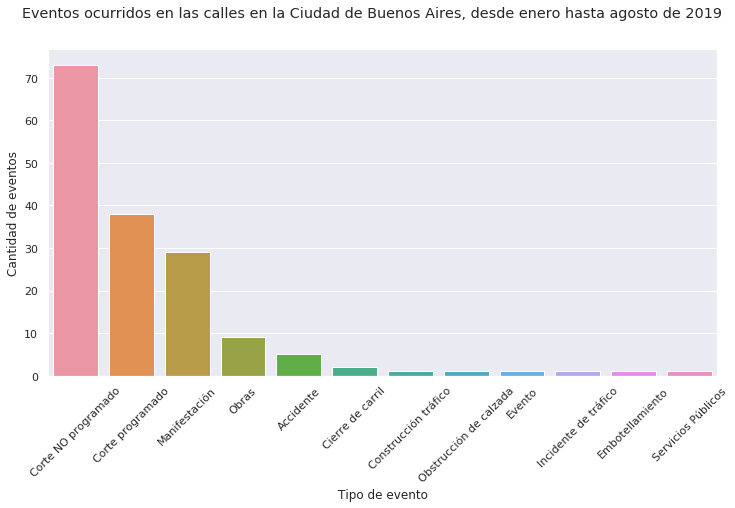

In [0]:
figure()
sns.set(style="darkgrid")
figure(figsize=(12,6))
ax = sns.countplot(x="type", data=df, order = df['type'].value_counts().index)
ax.set_xlabel("Tipo de evento")
ax.set_ylabel("Cantidad de eventos")
plt.xticks(rotation=45)
suptitle("Eventos ocurridos en las calles en la Ciudad de Buenos Aires, desde enero hasta agosto de 2019")
show()